In [5]:
# Import des bibliothèques nécessaires
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score




# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest()),
    ('dimensionality_reduction', PCA()),
    ('knn', KNeighborsClassifier())
])


In [6]:
iris = load_iris()
X, y = iris.data, iris.target

# Fractionnement des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Définition de la grille des hyperparamètres à rechercher
param_grid = {
    'feature_selection__k': [1, 2, 3, 4],
    'dimensionality_reduction__n_components': [2, 3, 4],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

In [8]:
# Initialisation de la recherche par grille
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Entraînement de la recherche par grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

C:\Users\33658\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\33658\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\33658\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection', SelectKBest()),
                                       ('dimensionality_reduction', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'dimensionality_reduction__n_components': [2, 3, 4],
                         'feature_selection__k': [1, 2, 3, 4],
                         'knn__n_neighbors': [3, 5, 7, 9],
                         'knn__weights': ['uniform', 'distance']})

In [9]:
# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

# Meilleur score sur l'ensemble de validation croisée
best_score = grid_search.best_score_
print("Meilleur score sur l'ensemble de validation croisée:", best_score)

# Prédiction sur l'ensemble de test
y_pred = grid_search.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle avec les meilleurs hyperparamètres sur l'ensemble de test:", accuracy)


Meilleurs hyperparamètres: {'dimensionality_reduction__n_components': 2, 'feature_selection__k': 2, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Meilleur score sur l'ensemble de validation croisée: 0.975
Précision du modèle avec les meilleurs hyperparamètres sur l'ensemble de test: 1.0


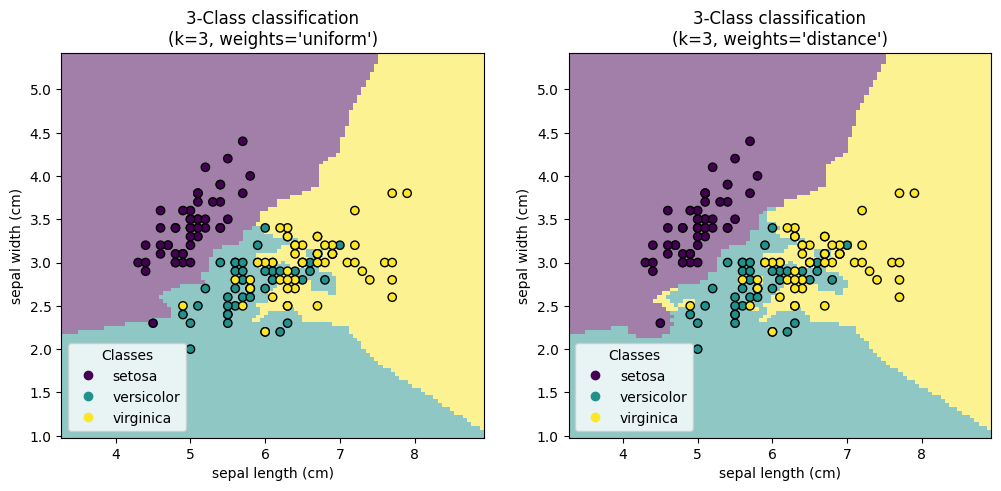

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Sélection des deux premières caractéristiques de l'ensemble de données Iris
X_2d = X[:, :2]

# Création du pipeline avec les meilleurs hyperparamètres trouvés
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(k=best_params['feature_selection__k'])),
    ('dimensionality_reduction', PCA(n_components=best_params['dimensionality_reduction__n_components'])),
    ('knn', KNeighborsClassifier(n_neighbors=best_params['knn__n_neighbors'], weights=best_params['knn__weights']))
])

# Entraînement du pipeline sur l'ensemble d'entraînement complet
pipeline.fit(X_2d, y)

# Affichage des frontières de décision avec DecisionBoundaryDisplay
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    pipeline.set_params(knn__weights=weights)
    disp = DecisionBoundaryDisplay.from_estimator(
        pipeline,
        X_2d,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={best_params['knn__n_neighbors']}, weights={weights!r})"
    )

plt.show()
